<a href="https://colab.research.google.com/github/Rahul-Malayil/CodSoft/blob/main/charnpredictioncustumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

Customer Churn Prediction

Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

Develop a model to predict customer churn for a subscription
based service or business. Use historical customer data, including
 features like usage behavior and customer demographics, and try
 algorithms like Logistic Regression, Random Forests, or Gradient
 Boosting to predict churn

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.size

140000

In [6]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum().mean()*100,2

(0.0, 2)

In [13]:
df2= df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df2['Age'].fillna(np.mean(df2['Age']),inplace=True)
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
nu=df2.select_dtypes(include='number')
nu

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [17]:
nu.skew()

,0
CreditScore,-0.071607
Age,1.011320
Tenure,0.010991
Balance,-0.141109
NumOfProducts,0.745568
HasCrCard,-0.901812
IsActiveMember,-0.060437
EstimatedSalary,0.002085
Exited,1.471611


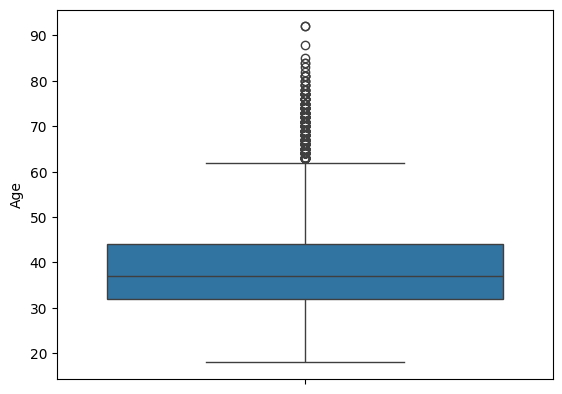

In [18]:
sns.boxplot(df2['Age'])
plt.show()

In [19]:
df2['Age'].skew()

1.0113202630234552

In [20]:
df2['Age'].describe()

,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


In [21]:
import pandas as pd
Q1=df2['Age'].quantile(0.25)
Q3=df2['Age'].quantile(0.75)
IQR=Q3-Q1

In [22]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
datawithout=df2[(df2['Age']<high) & (df2['Age']>low)]

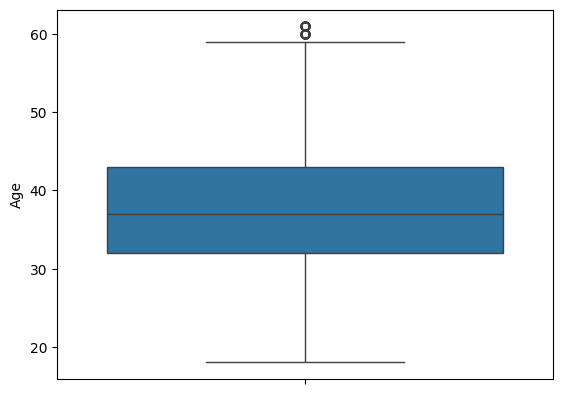

In [23]:
sns.boxplot(datawithout['Age'])
plt.show()

In [24]:
datawithout['Age'].skew()

0.44721544739487257

In [25]:
datawithout.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9589.000000,9589.000000,9589.000000,9589.000000,9589.000000,9589.000000,9589.000000,9589.000000,9589.000000
mean,650.287830,37.660444,5.013974,76552.236761,1.530921,0.705809,0.502138,100200.278401,0.202628
std,96.660575,8.644055,2.888560,62422.133272,0.581498,0.455702,0.500022,57500.956105,0.401979
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51226.320000,0.000000
50%,652.000000,37.000000,5.000000,97266.100000,1.000000,1.000000,1.000000,100335.550000,0.000000
75%,717.000000,43.000000,7.000000,127661.690000,2.000000,1.000000,1.000000,149458.730000,0.000000
max,850.000000,61.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [26]:
datawithout['Exited'].value_counts()

,count
Exited,
0,7646
1,1943


In [27]:
df['Exited'].unique()

array([1, 0])

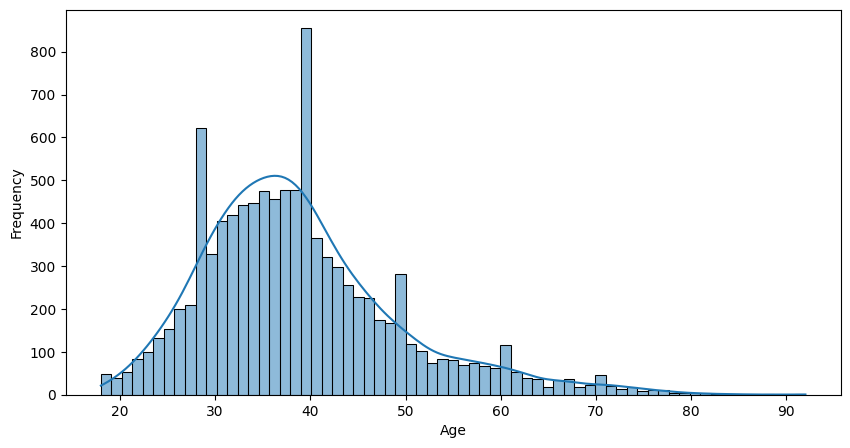

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

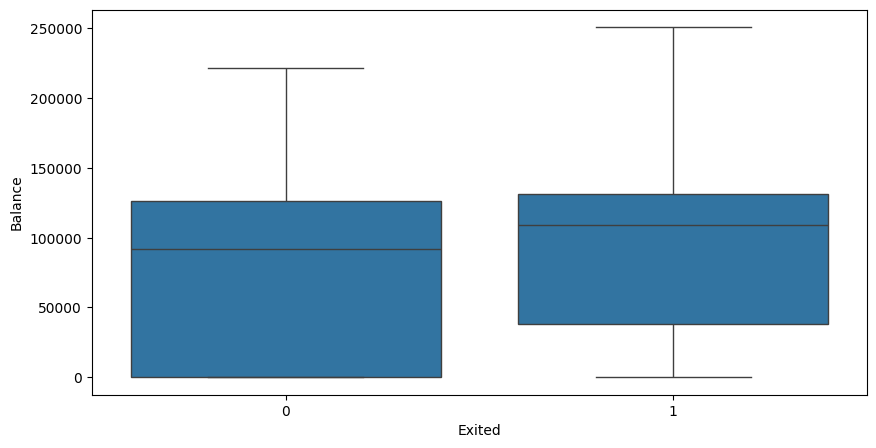

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Exited',y='Balance',data=df)
plt.xlabel("Exited")
plt.show()

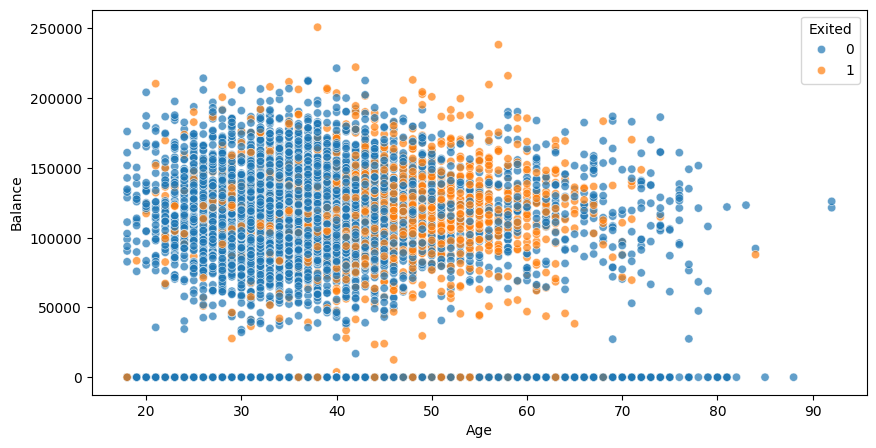

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Age'], y=df['Balance'], hue=df['Exited'], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
from sklearn.utils import resample
import pandas as pd

# Identify the correct column name for class labels in your dataset
class_label_column = 'Exited'  # Replace 'Exited' with the actual column name

# assume df is your dataset with 'class_label_column' column being the class label
df_majority = datawithout[datawithout[class_label_column]==0]
df_minority = datawithout[datawithout[class_label_column]==1]

# oversample the minority class
df_minority_oversampled = resample(df_minority,
                                  replace=True,     # sample with replacement
                                  n_samples=len(df_majority),    # to match majority class
                                  random_state=42)   # reproducible results

# combine the oversampled minority class with the majority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

In [33]:
df_balanced

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
5949,742,Germany,Female,44,8,107926.02,1,0,1,17375.27,1
1940,531,Germany,Female,31,7,117052.82,1,1,0,118508.09,1
860,667,France,Male,43,8,190227.46,1,1,0,97508.04,1
2196,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1


In [34]:
df_balanced['Exited'].value_counts()

,count
Exited,
0,7646
1,7646


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Use df_balanced['Gender'] to fit and transform
df_balanced['Gender'] = le.fit_transform(df_balanced['Gender'])
df_balanced

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
5949,742,Germany,0,44,8,107926.02,1,0,1,17375.27,1
1940,531,Germany,0,31,7,117052.82,1,1,0,118508.09,1
860,667,France,1,43,8,190227.46,1,1,0,97508.04,1
2196,773,Germany,1,47,2,118079.47,4,1,1,143007.49,1


In [36]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

# Fit and transform on the same DataFrame 'df_balanced'
df_balanced[['Geography_France', 'Geography_Spain', 'Geography_other']] = ohe.fit_transform(df_balanced[['Geography']])

df_balanced.drop('Geography', axis=1, inplace=True)
df_balanced

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_other
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1.0,0.0,0.0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,742,0,44,8,107926.02,1,0,1,17375.27,1,0.0,1.0,0.0
1940,531,0,31,7,117052.82,1,1,0,118508.09,1,0.0,1.0,0.0
860,667,1,43,8,190227.46,1,1,0,97508.04,1,1.0,0.0,0.0
2196,773,1,47,2,118079.47,4,1,1,143007.49,1,0.0,1.0,0.0


In [37]:
df_balanced['Exited'].value_counts()

,count
Exited,
0,7646
1,7646


In [38]:
x=df_balanced.drop('Exited',axis=1)#Feature
y=df_balanced['Exited']#Target

In [39]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_other
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
6,822,1,50,7,0.00,2,1,1,10062.80,1.0,0.0,0.0
8,501,1,44,4,142051.07,2,0,1,74940.50,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5949,742,0,44,8,107926.02,1,0,1,17375.27,0.0,1.0,0.0
1940,531,0,31,7,117052.82,1,1,0,118508.09,0.0,1.0,0.0
860,667,1,43,8,190227.46,1,1,0,97508.04,1.0,0.0,0.0
2196,773,1,47,2,118079.47,4,1,1,143007.49,0.0,1.0,0.0


In [40]:
y

,Exited
1,0
3,0
4,0
6,0
8,0
...,...
5949,1
1940,1
860,1
2196,1


In [41]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 x_scaled = scaler.fit_transform(x)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [43]:
x_train.shape

(12233, 12)

In [44]:
y_train.shape

(12233,)

In [45]:
x_test.shape

(3059, 12)

In [46]:
y_test.shape

(3059,)

In [47]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred=logreg.predict(x_test)

In [49]:
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [50]:
y_test

,Exited
7000,0
2815,0
1172,0
5205,0
227,1
...,...
8923,1
3184,1
5710,0
7528,0


In [51]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
7000,0,0
2815,0,1
1172,0,1
5205,0,0
227,1,1
...,...,...
8923,1,1
3184,1,1
5710,0,0
7528,0,1


In [52]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.7296502124877411


Random  Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [56]:
x_train.shape

(12233, 12)

In [57]:
y_train.shape

(12233,)

In [58]:
x_test.shape

(3059, 12)

In [59]:
y_test.shape

(3059,)

In [60]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
# Assuming the data has been split into x_train, x_test, y_train, y_test
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [62]:
y_test

,Exited
7000,0
2815,0
1172,0
5205,0
227,1
...,...
8923,1
3184,1
5710,0
7528,0


In [63]:
result_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_df

,Actual,Predicted
7000,0,0
2815,0,0
1172,0,0
5205,0,0
227,1,1
...,...,...
8923,1,1
3184,1,1
5710,0,0
7528,0,1


In [64]:
# Accuracy score
accuracy1 = accuracy_score(y_pred, y_pred)
print("Accuracy Score:")
print(accuracy1)

Accuracy Score:
1.0
